## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from gplearn.genetic import SymbolicRegressor
import os
import seaborn as sns
import matplotlib.pyplot as plt

from Model_Parent import *
from Model_Parent_2 import *


## Importing Data

In [2]:
df = pd.read_csv("../cleaned_data/AirQualityUCI_fixed_cleaned.csv", index_col=0)

In [3]:
df

,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S5(O3),T,RH,AH,PT08.S4(NO2)
0,0,1360.0,11.9,1046.0,1056.0,1268.0,13.6,48.9,0.7578,1692.0
1,1,1292.0,9.4,955.0,1174.0,972.0,13.3,47.7,0.7255,1559.0
2,2,1402.0,9.0,939.0,1140.0,1074.0,11.9,54.0,0.7502,1555.0
3,3,1376.0,9.2,948.0,1092.0,1203.0,11.0,60.0,0.7867,1584.0
4,4,1272.0,6.5,836.0,1205.0,1110.0,11.2,59.6,0.7888,1490.0
...,...,...,...,...,...,...,...,...,...,...
8986,9352,1314.0,13.5,1101.0,539.0,1729.0,21.9,29.3,0.7568,1374.0
8987,9353,1163.0,11.4,1027.0,604.0,1269.0,24.3,23.7,0.7119,1264.0
8988,9354,1142.0,12.4,1063.0,603.0,1092.0,26.9,18.3,0.6406,1241.0
8989,9355,1003.0,9.5,961.0,702.0,770.0,28.3,13.5,0.5139,1041.0


## Checking Data

In [4]:
# Check to make sure that no columns have perfect colinearity

<AxesSubplot:>

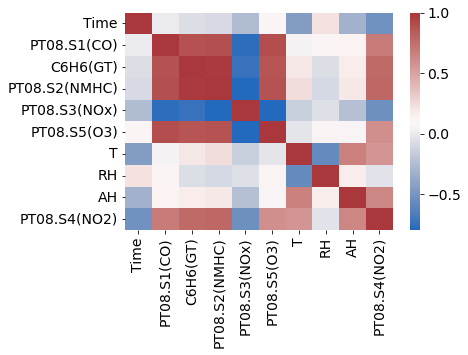

In [5]:
corr_mat = df.corr(method='pearson')
sns.heatmap(corr_mat, cmap='vlag')

## Breaking Data in X and y

In [6]:
X = df.iloc[:,:-1]

In [7]:
y = df.iloc[:,-1]

## Generating Models

### Linear Regression

In [8]:
lr = linear_model.LinearRegression()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:25:57   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          101

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:239: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


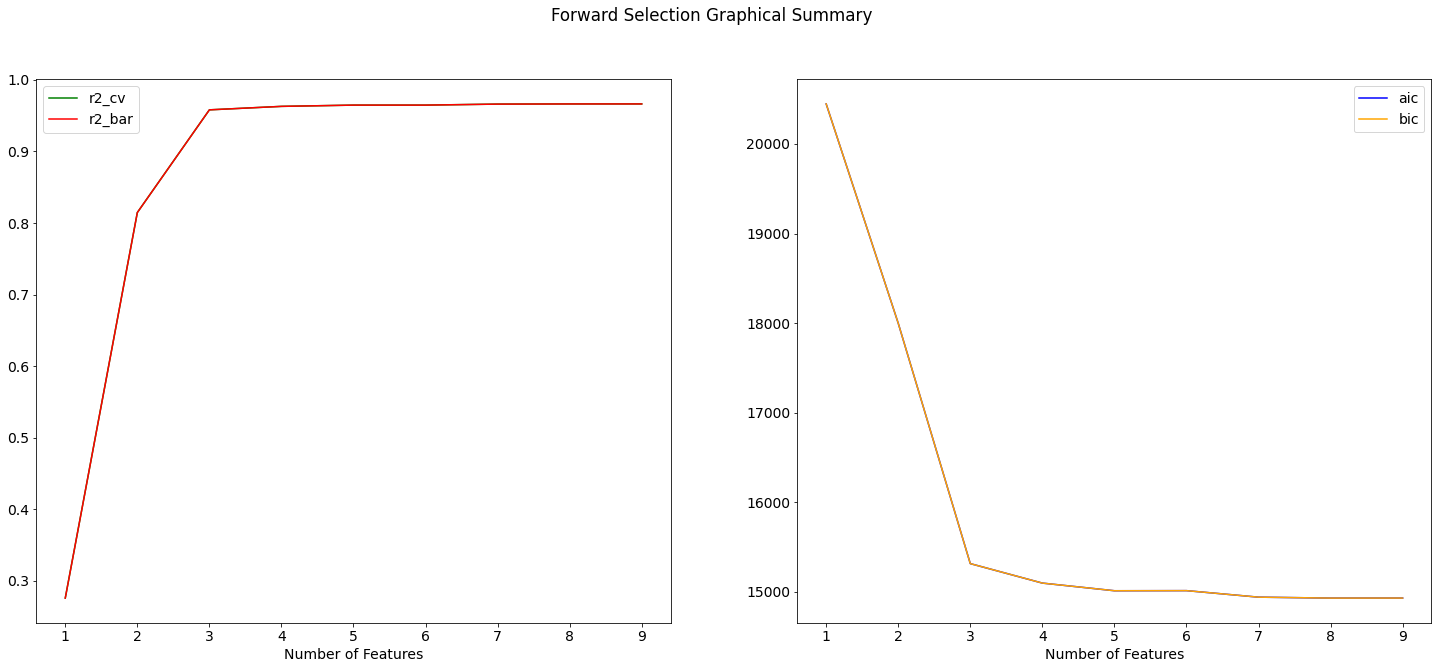

In [9]:
forwardSelection(lr, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:25:58   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          10

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:348: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


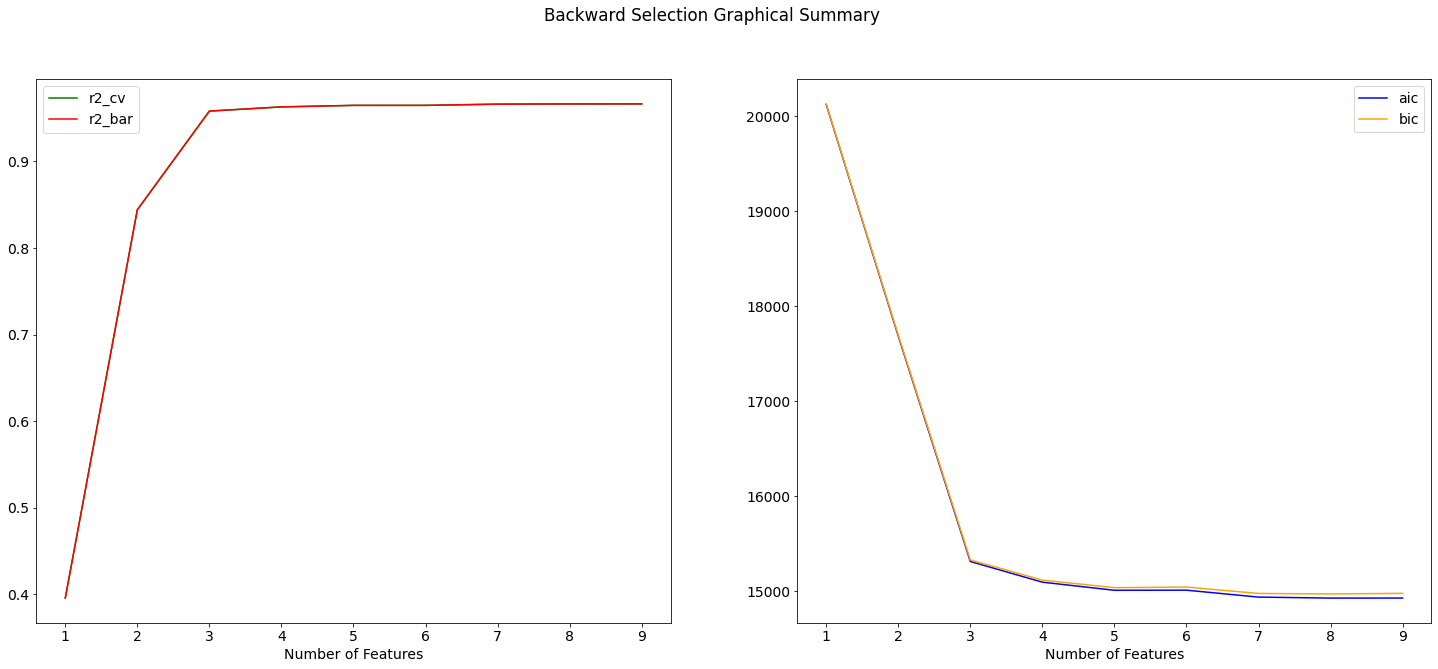

In [10]:
backwardSelection(lr, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:25:59   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          10

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:479: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


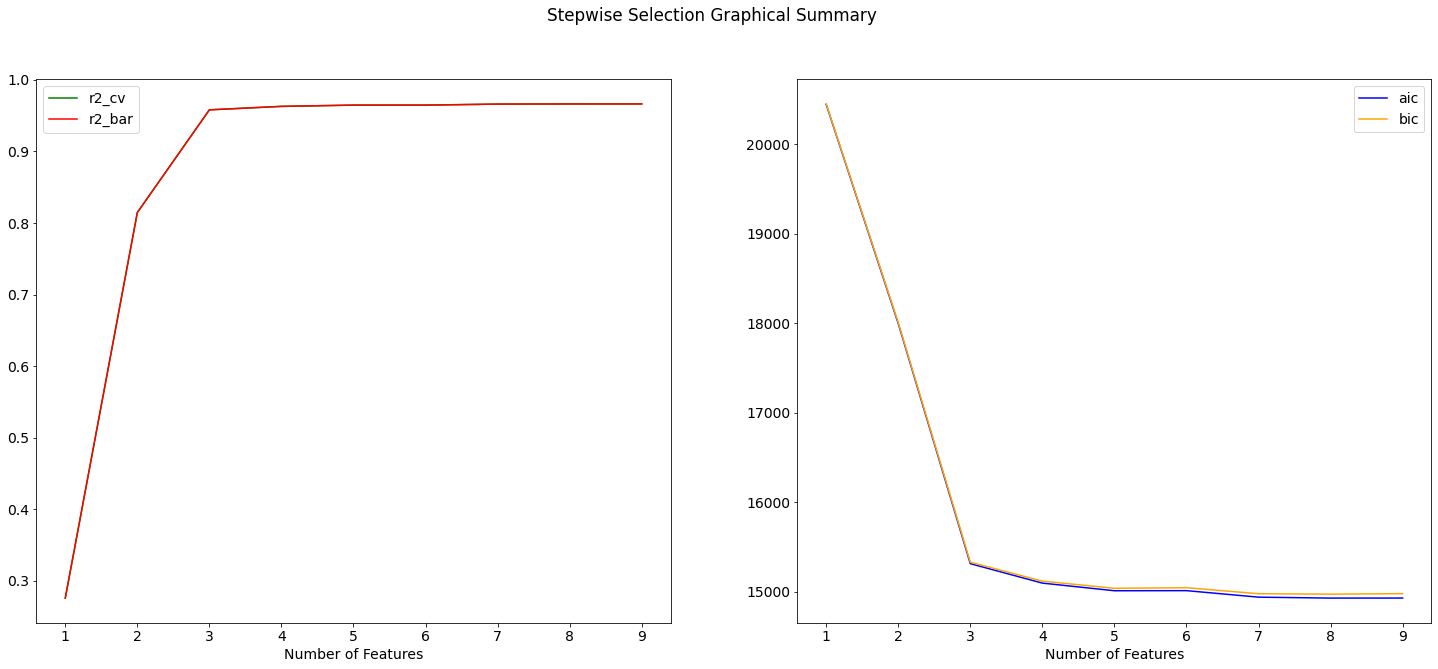

In [11]:
stepwiseSelection(lr, X, y)

### Ridge Regression

In [12]:
ridge = linear_model.Ridge()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:25:59   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          101

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:239: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


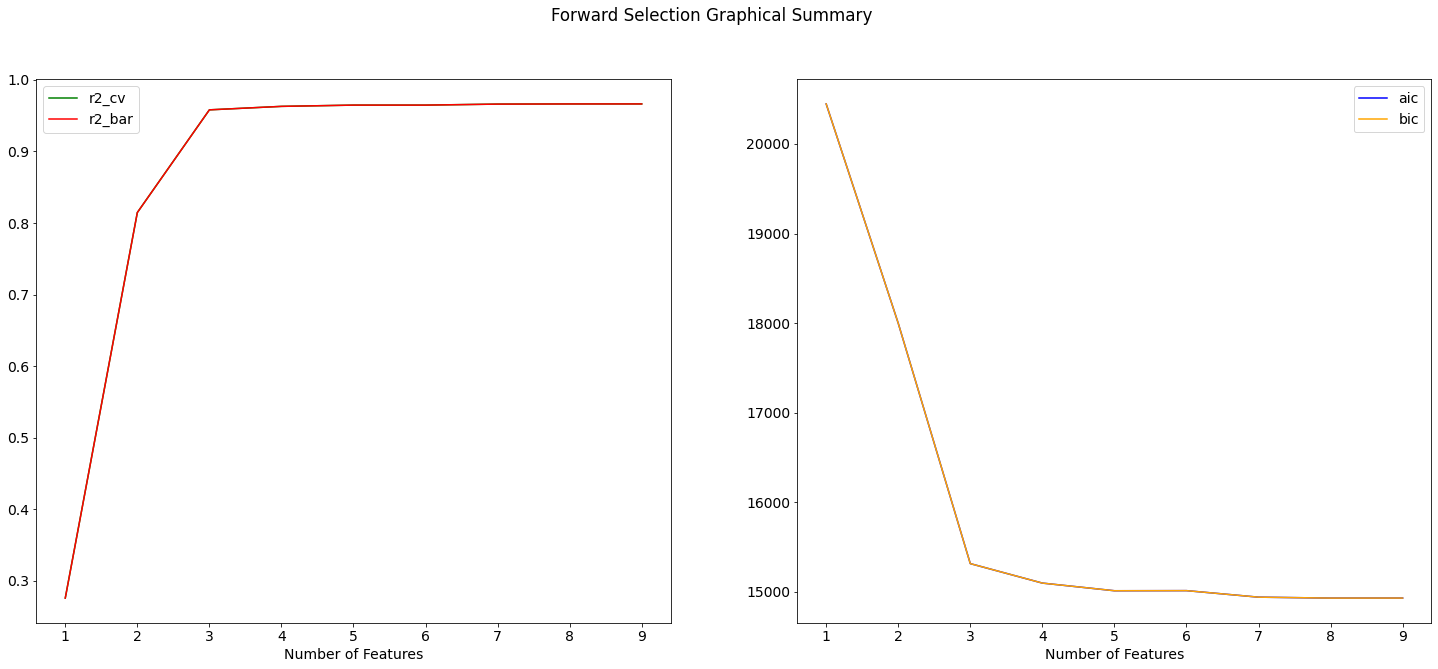

In [13]:
forwardSelection(ridge, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:26:00   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          10

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:348: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


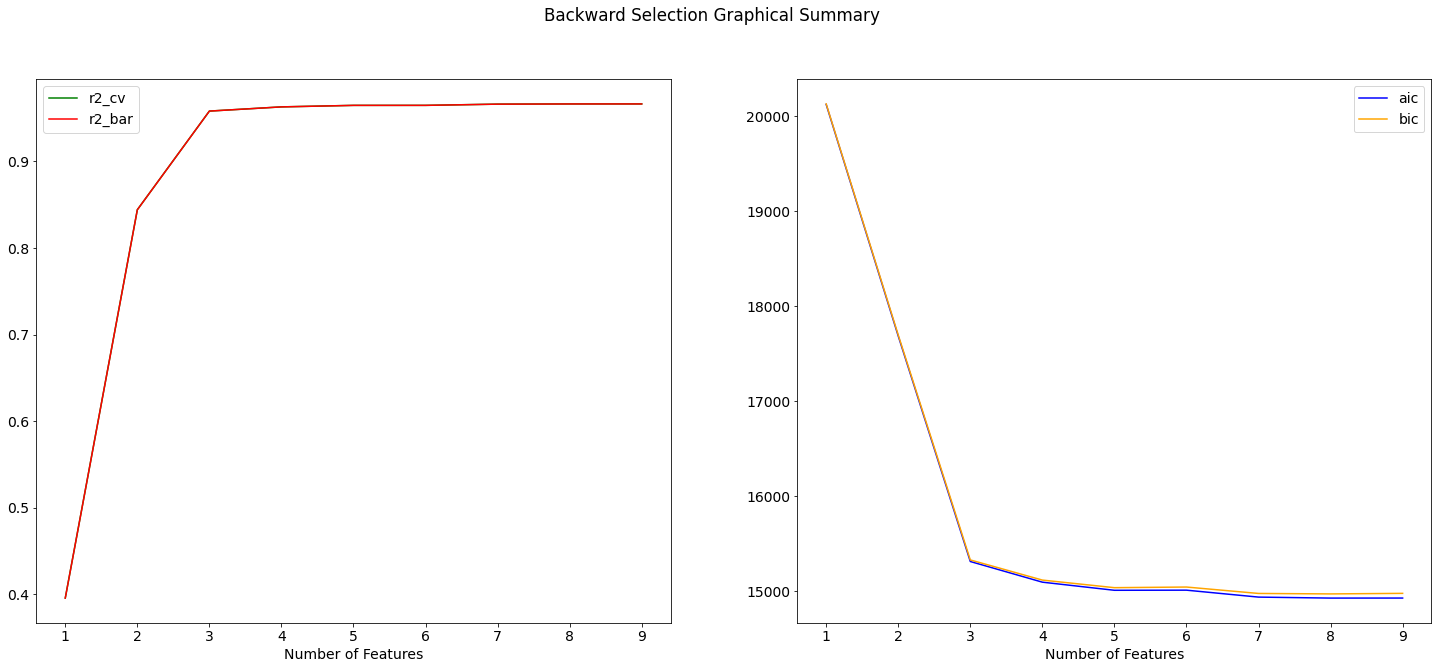

In [14]:
backwardSelection(ridge, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:26:01   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          10

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:479: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


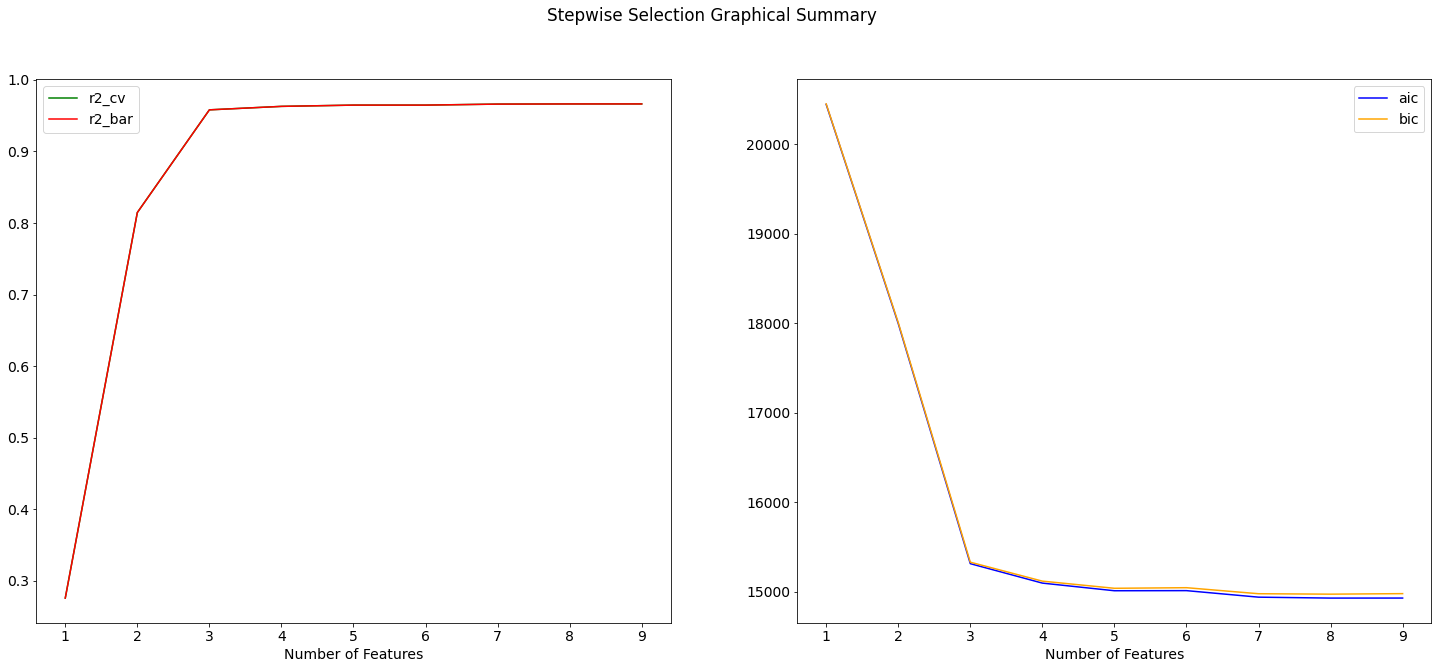

In [15]:
stepwiseSelection(ridge, X, y)

### Lasso Regression

In [16]:
lasso = linear_model.Lasso()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:26:01   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          101

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:239: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


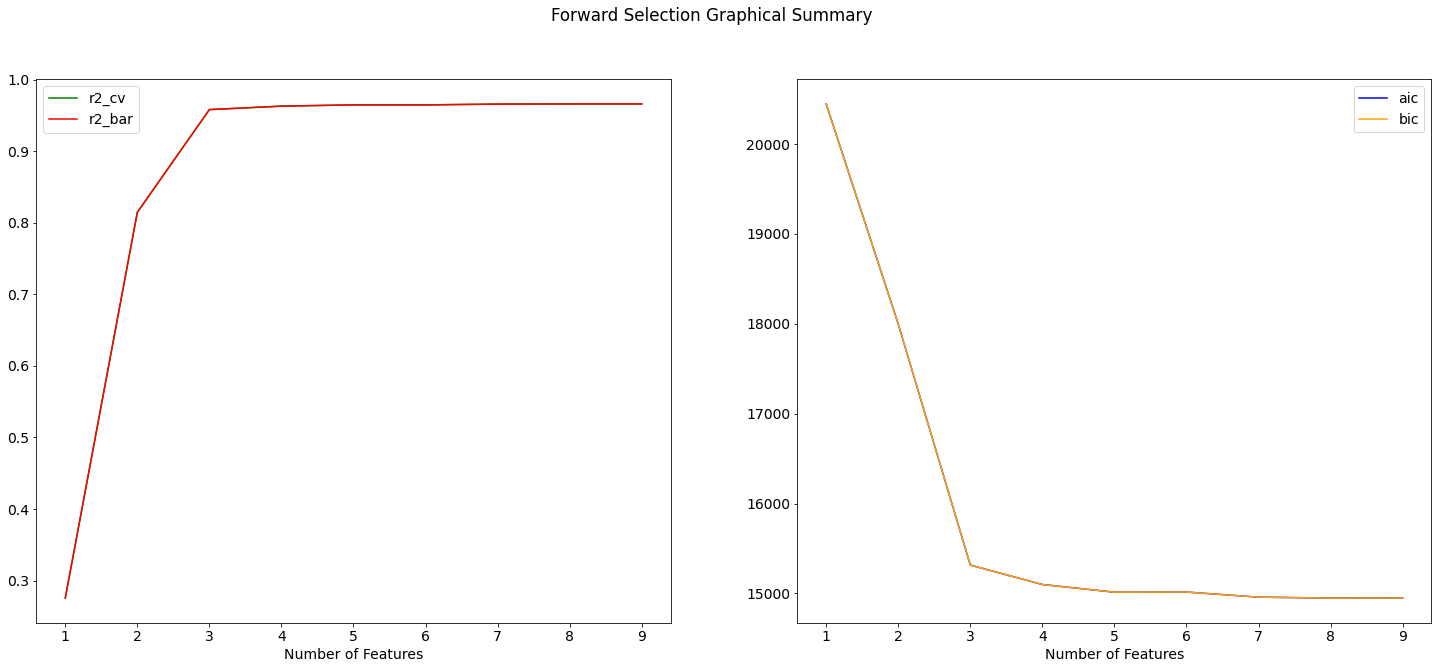

In [17]:
forwardSelection(lasso, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:26:02   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          10

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:348: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


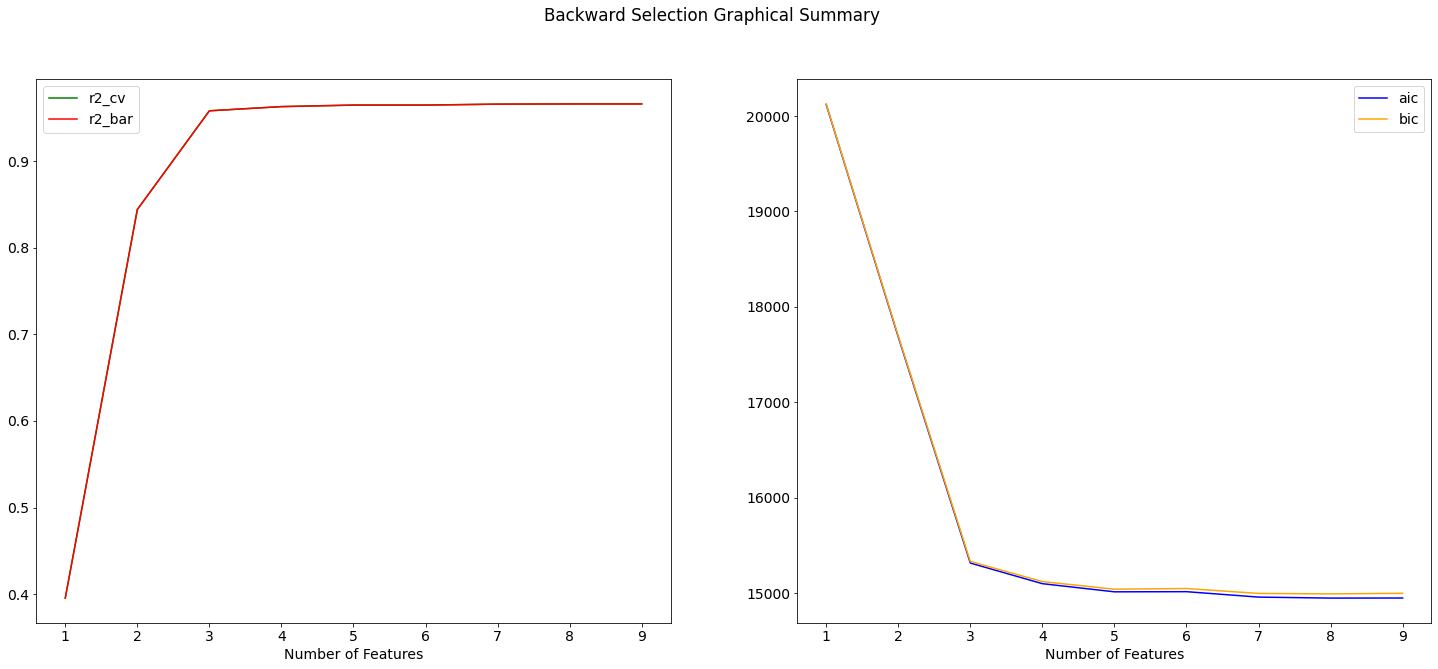

In [18]:
backwardSelection(lasso, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:26:03   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          10

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:479: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


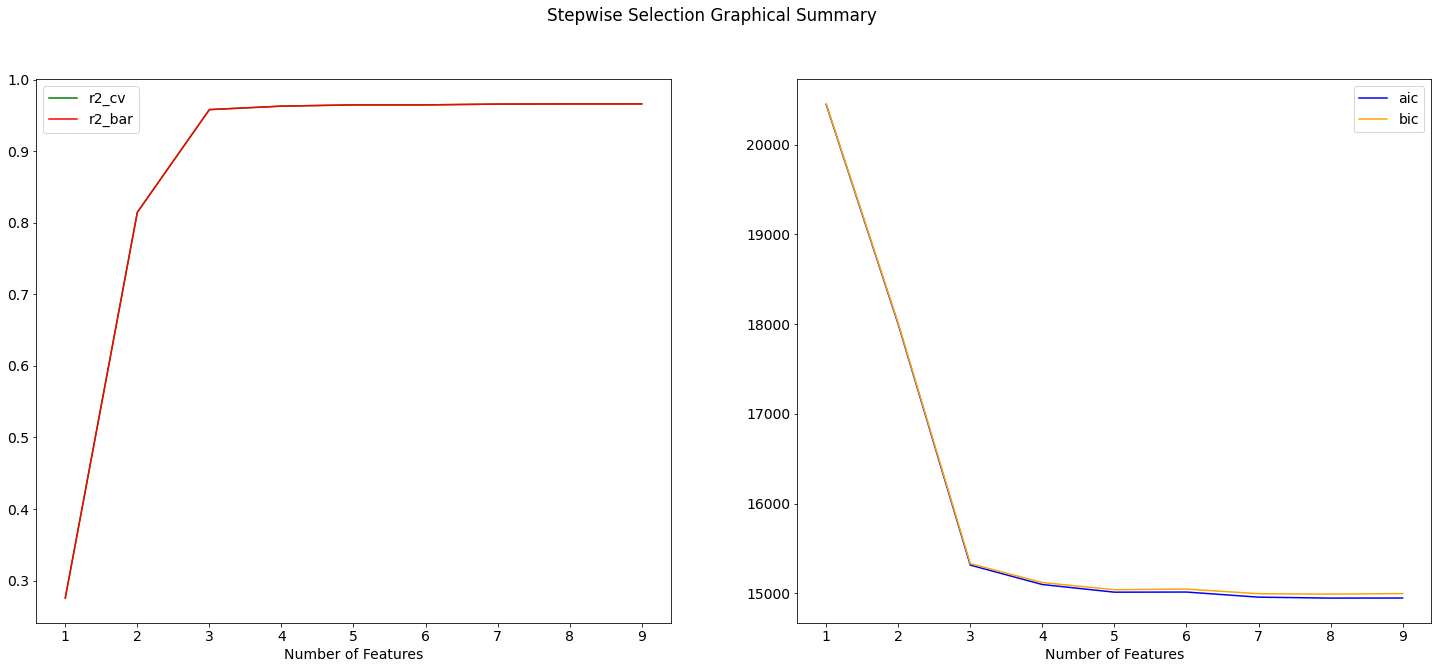

In [19]:
stepwiseSelection(lasso, X, y)

### Symbolic Regression

In [20]:
sym_reg = SymbolicRegressor()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:26:04   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          101

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:239: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


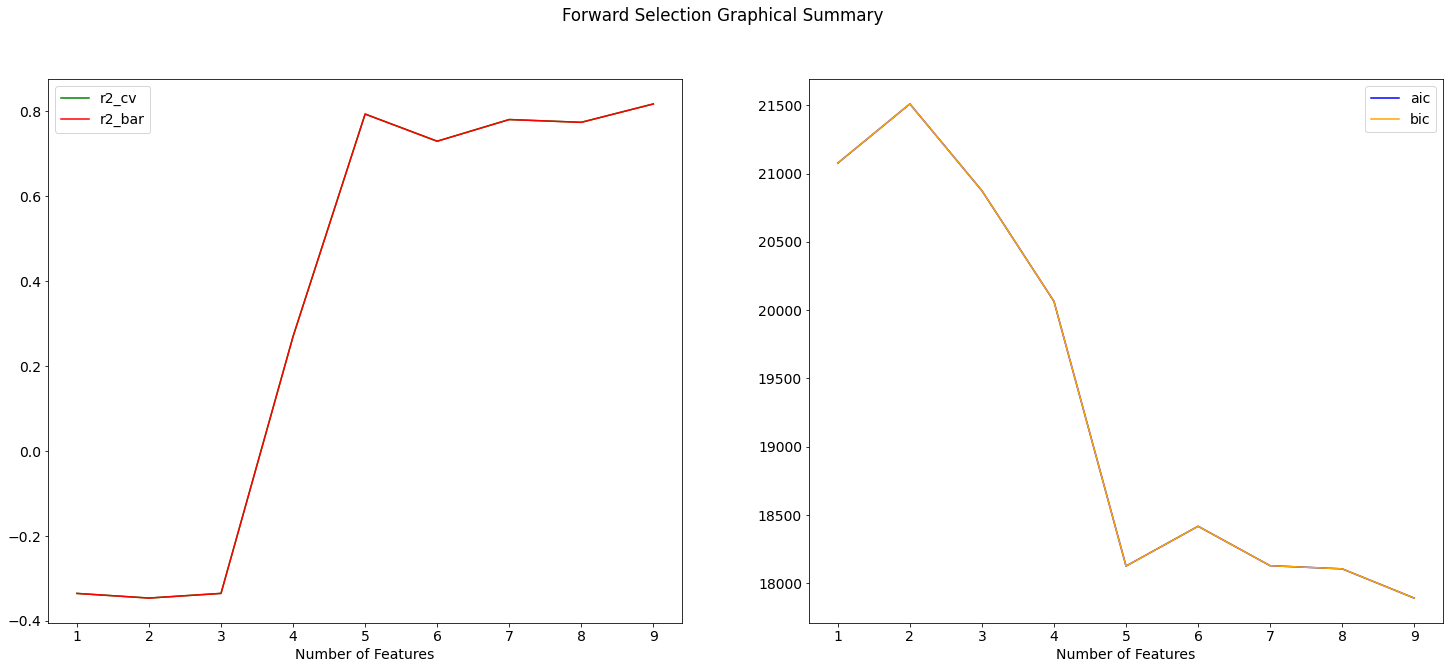

In [21]:
forwardSelection(sym_reg, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:45:42   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          10

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:348: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


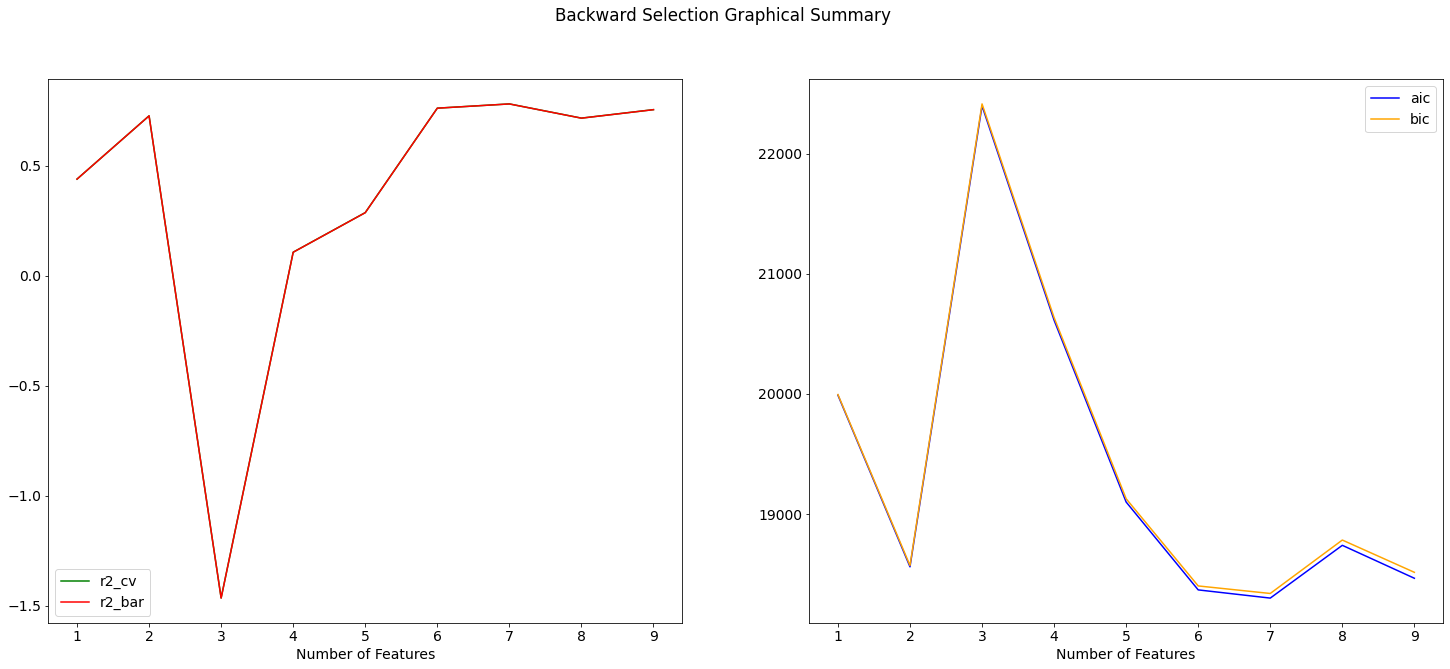

In [22]:
backwardSelection(sym_reg, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:01:37   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          10

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:479: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


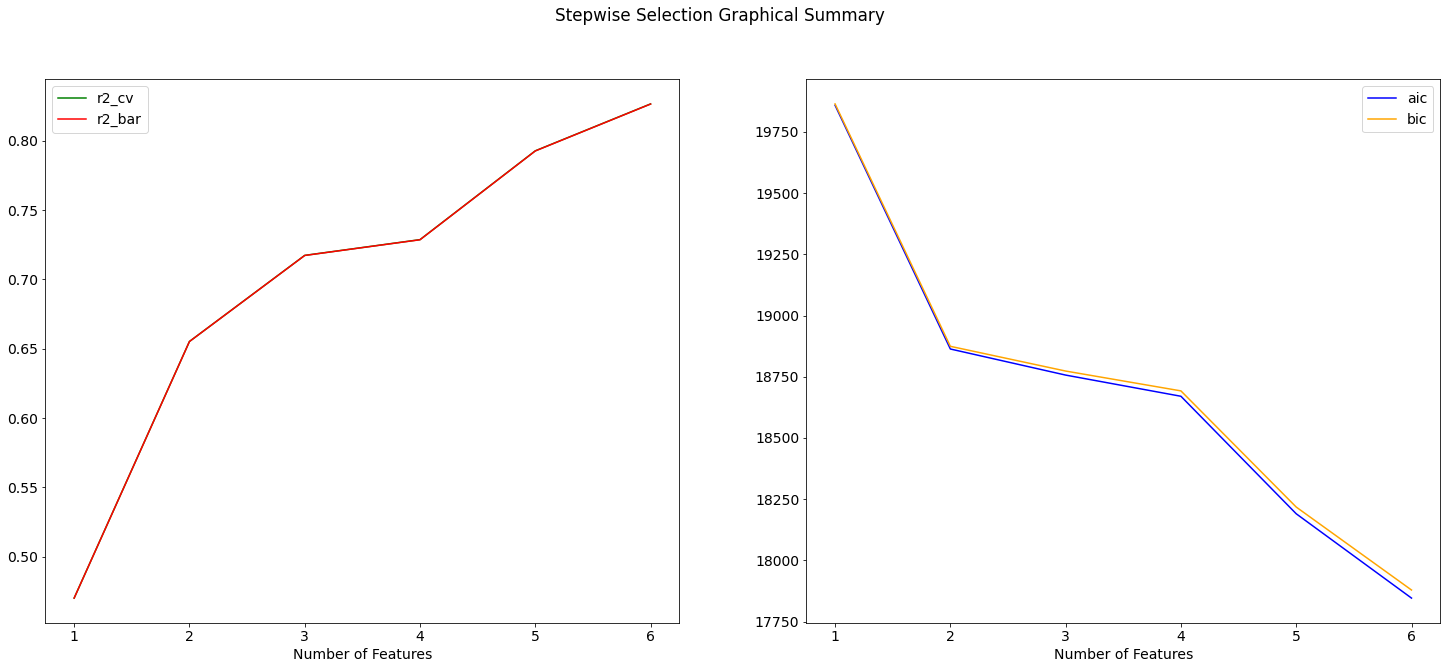

In [23]:
stepwiseSelection(sym_reg, X, y)

### Quadratic Regression

In [24]:
quad_reg = PolynomialFeatures(degree=2)
X_quad = quad_reg.fit_transform(X)
X_quad = pd.DataFrame(X_quad, columns=quad_reg.get_feature_names())
lr_q = linear_model.LinearRegression()
X_quad.apply(lambda col: col.reset_index(drop=True))
X_quad = X_quad.drop(columns = ["1"])
y_quad = y.reset_index(drop=True)
X_quad

C:\Users\spenc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x0^2,...,x5^2,x5 x6,x5 x7,x5 x8,x6^2,x6 x7,x6 x8,x7^2,x7 x8,x8^2
0,0.0,1360.0,11.9,1046.0,1056.0,1268.0,13.6,48.9,0.7578,0.0,...,1607824.0,17244.8,62005.2,960.8904,184.96,665.04,10.30608,2391.21,37.05642,0.574261
1,1.0,1292.0,9.4,955.0,1174.0,972.0,13.3,47.7,0.7255,1.0,...,944784.0,12927.6,46364.4,705.1860,176.89,634.41,9.64915,2275.29,34.60635,0.526350
2,2.0,1402.0,9.0,939.0,1140.0,1074.0,11.9,54.0,0.7502,4.0,...,1153476.0,12780.6,57996.0,805.7148,141.61,642.60,8.92738,2916.00,40.51080,0.562800
3,3.0,1376.0,9.2,948.0,1092.0,1203.0,11.0,60.0,0.7867,9.0,...,1447209.0,13233.0,72180.0,946.4001,121.00,660.00,8.65370,3600.00,47.20200,0.618897
4,4.0,1272.0,6.5,836.0,1205.0,1110.0,11.2,59.6,0.7888,16.0,...,1232100.0,12432.0,66156.0,875.5680,125.44,667.52,8.83456,3552.16,47.01248,0.622205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,9352.0,1314.0,13.5,1101.0,539.0,1729.0,21.9,29.3,0.7568,87459904.0,...,2989441.0,37865.1,50659.7,1308.5072,479.61,641.67,16.57392,858.49,22.17424,0.572746
8987,9353.0,1163.0,11.4,1027.0,604.0,1269.0,24.3,23.7,0.7119,87478609.0,...,1610361.0,30836.7,30075.3,903.4011,590.49,575.91,17.29917,561.69,16.87203,0.506802
8988,9354.0,1142.0,12.4,1063.0,603.0,1092.0,26.9,18.3,0.6406,87497316.0,...,1192464.0,29374.8,19983.6,699.5352,723.61,492.27,17.23214,334.89,11.72298,0.410368
8989,9355.0,1003.0,9.5,961.0,702.0,770.0,28.3,13.5,0.5139,87516025.0,...,592900.0,21791.0,10395.0,395.7030,800.89,382.05,14.54337,182.25,6.93765,0.264093



FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.463e+04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:21:41   Log-Likelihood:                -45127.
No. Observations:                8991   AIC:                         9.036e+04
Df Residuals:                    8936   BIC:                         9.076e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        942.7991   

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:239: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


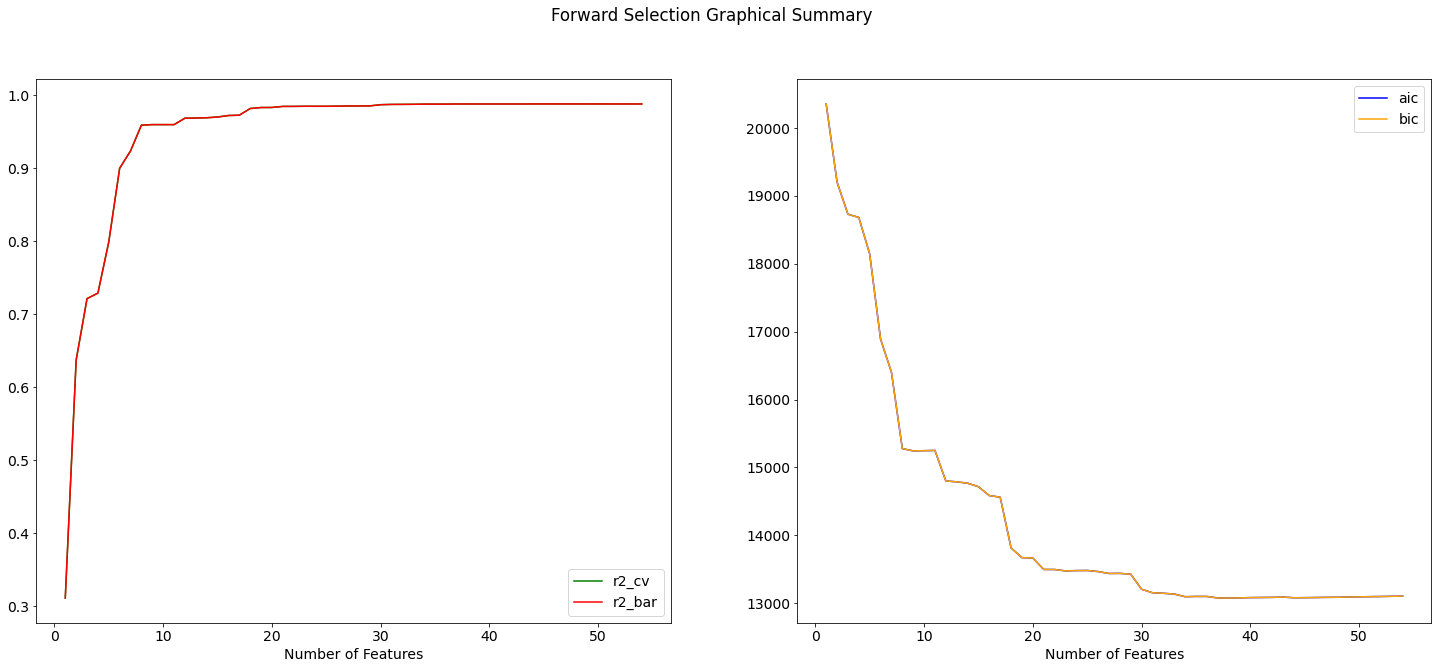

In [25]:
forwardSelection(lr_q, X_quad, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.463e+04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:21:44   Log-Likelihood:                -45127.
No. Observations:                8991   AIC:                         9.036e+04
Df Residuals:                    8936   BIC:                         9.076e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        942.7991  

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:348: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


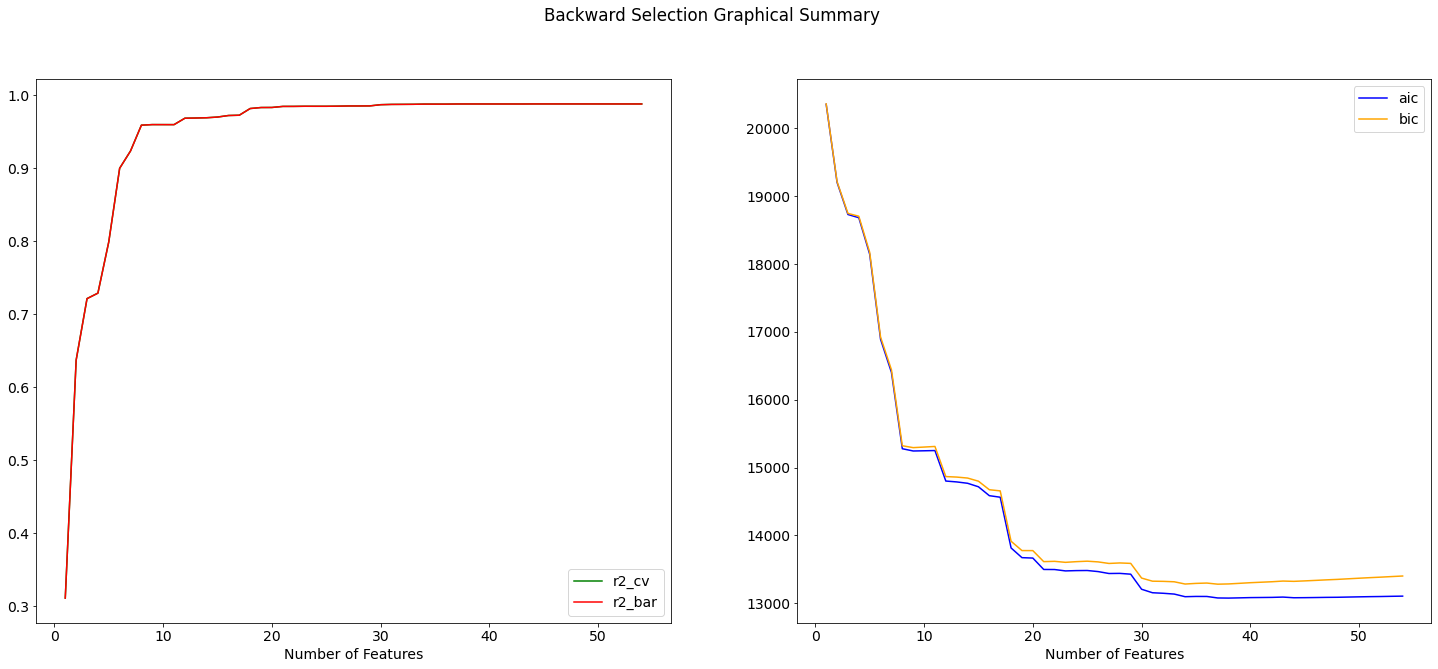

In [26]:
backwardSelection(lr_q, X_quad, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.463e+04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:21:47   Log-Likelihood:                -45127.
No. Observations:                8991   AIC:                         9.036e+04
Df Residuals:                    8936   BIC:                         9.076e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        942.7991  

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:479: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


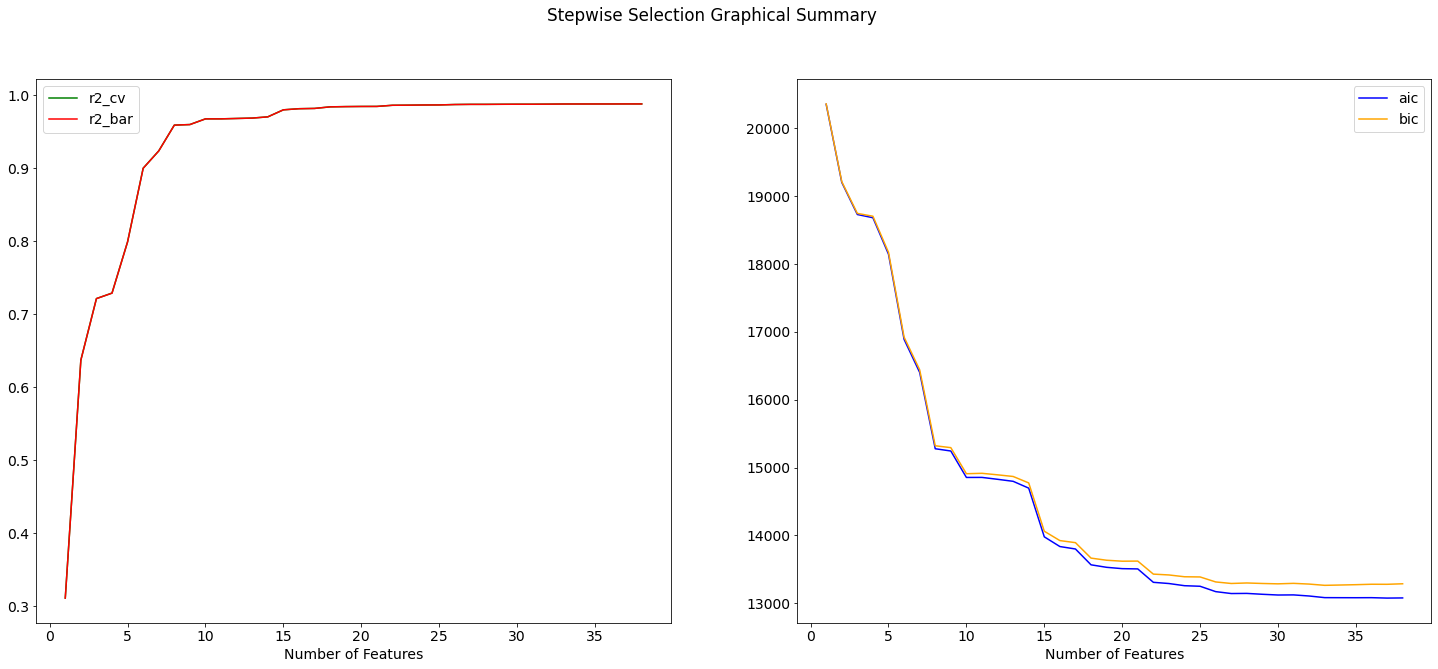

In [27]:
stepwiseSelection(lr_q, X_quad, y)

### Cubic Regression

In [28]:
cub_reg = PolynomialFeatures(degree=3)
X_cubic = cub_reg.fit_transform(X)
X_cubic = pd.DataFrame(X_cubic, columns=cub_reg.get_feature_names())
lr_c = linear_model.LinearRegression()
X_cubic.apply(lambda col: col.reset_index(drop=True))
X_cubic = X_cubic.drop(columns = ["1"])
y_cub = y.reset_index(drop=True)
X_cubic

C:\Users\spenc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x0^2,...,x6^3,x6^2 x7,x6^2 x8,x6 x7^2,x6 x7 x8,x6 x8^2,x7^3,x7^2 x8,x7 x8^2,x8^3
0,0.0,1360.0,11.9,1046.0,1056.0,1268.0,13.6,48.9,0.7578,0.0,...,2515.456,9044.544,140.162688,32520.456,503.967312,7.809947,116930.169,1812.058938,28.081355,0.435175
1,1.0,1292.0,9.4,955.0,1174.0,972.0,13.3,47.7,0.7255,1.0,...,2352.637,8437.653,128.333695,30261.357,460.264455,7.000458,108531.333,1650.722895,25.106907,0.381867
2,2.0,1402.0,9.0,939.0,1140.0,1074.0,11.9,54.0,0.7502,4.0,...,1685.159,7646.940,106.235822,34700.400,482.078520,6.697320,157464.000,2187.583200,30.391202,0.422213
3,3.0,1376.0,9.2,948.0,1092.0,1203.0,11.0,60.0,0.7867,9.0,...,1331.000,7260.000,95.190700,39600.000,519.222000,6.807866,216000.000,2832.120000,37.133813,0.486886
4,4.0,1272.0,6.5,836.0,1205.0,1110.0,11.2,59.6,0.7888,16.0,...,1404.928,7476.224,98.947072,39784.192,526.539776,6.968701,211708.736,2801.943808,37.083444,0.490796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,9352.0,1314.0,13.5,1101.0,539.0,1729.0,21.9,29.3,0.7568,87459904.0,...,10503.459,14052.573,362.968848,18800.931,485.615856,12.543143,25153.757,649.705232,16.781465,0.433454
8987,9353.0,1163.0,11.4,1027.0,604.0,1269.0,24.3,23.7,0.7119,87478609.0,...,14348.907,13994.613,420.369831,13649.067,409.990329,12.315279,13312.053,399.867111,12.011198,0.360792
8988,9354.0,1142.0,12.4,1063.0,603.0,1092.0,26.9,18.3,0.6406,87497316.0,...,19465.109,13242.063,463.544566,9008.541,315.348162,11.038909,6128.487,214.530534,7.509741,0.262882
8989,9355.0,1003.0,9.5,961.0,702.0,770.0,28.3,13.5,0.5139,87516025.0,...,22665.187,10812.015,411.577371,5157.675,196.335495,7.473838,2460.375,93.658275,3.565258,0.135718



FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     6679.
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:21:50   Log-Likelihood:                -42470.
No. Observations:                8991   AIC:                         8.536e+04
Df Residuals:                    8779   BIC:                         8.687e+04
Df Model:                         211                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.0807   

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:239: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


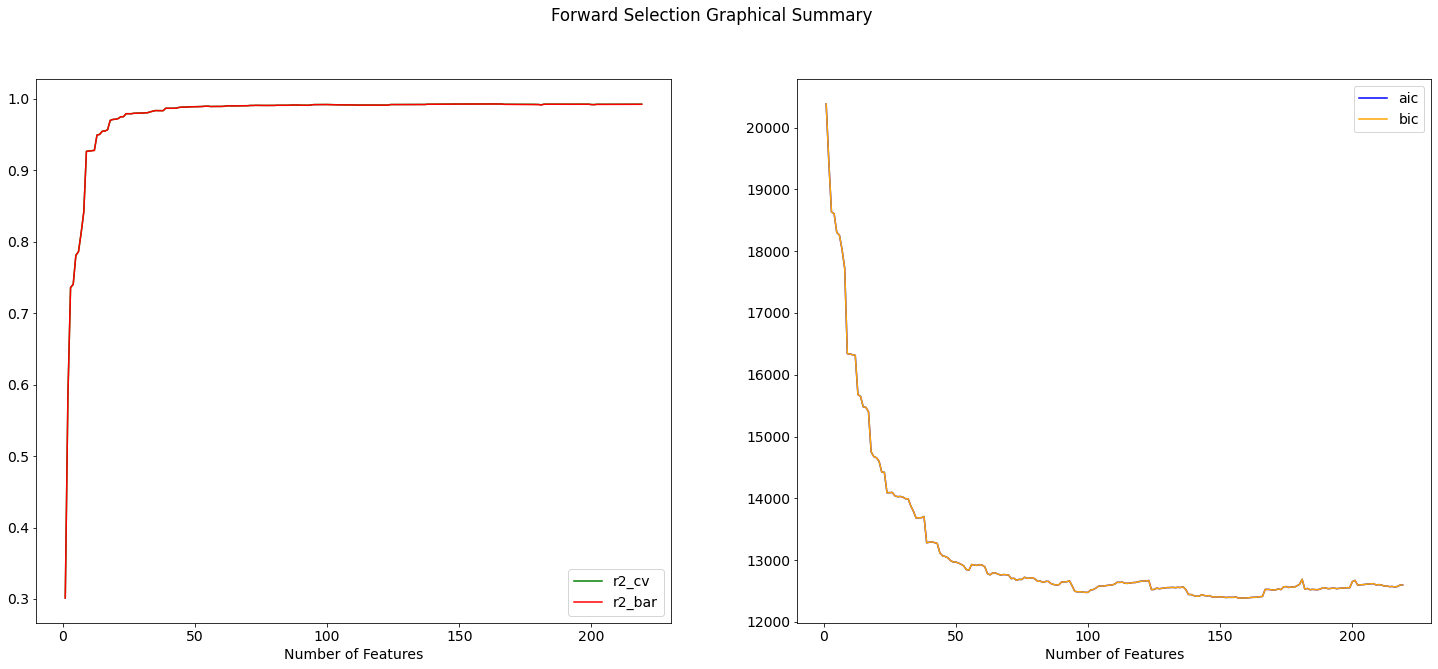

In [29]:
forwardSelection(lr_c, X_cubic, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     6679.
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:22:33   Log-Likelihood:                -42470.
No. Observations:                8991   AIC:                         8.536e+04
Df Residuals:                    8779   BIC:                         8.687e+04
Df Model:                         211                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.0807  

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:348: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


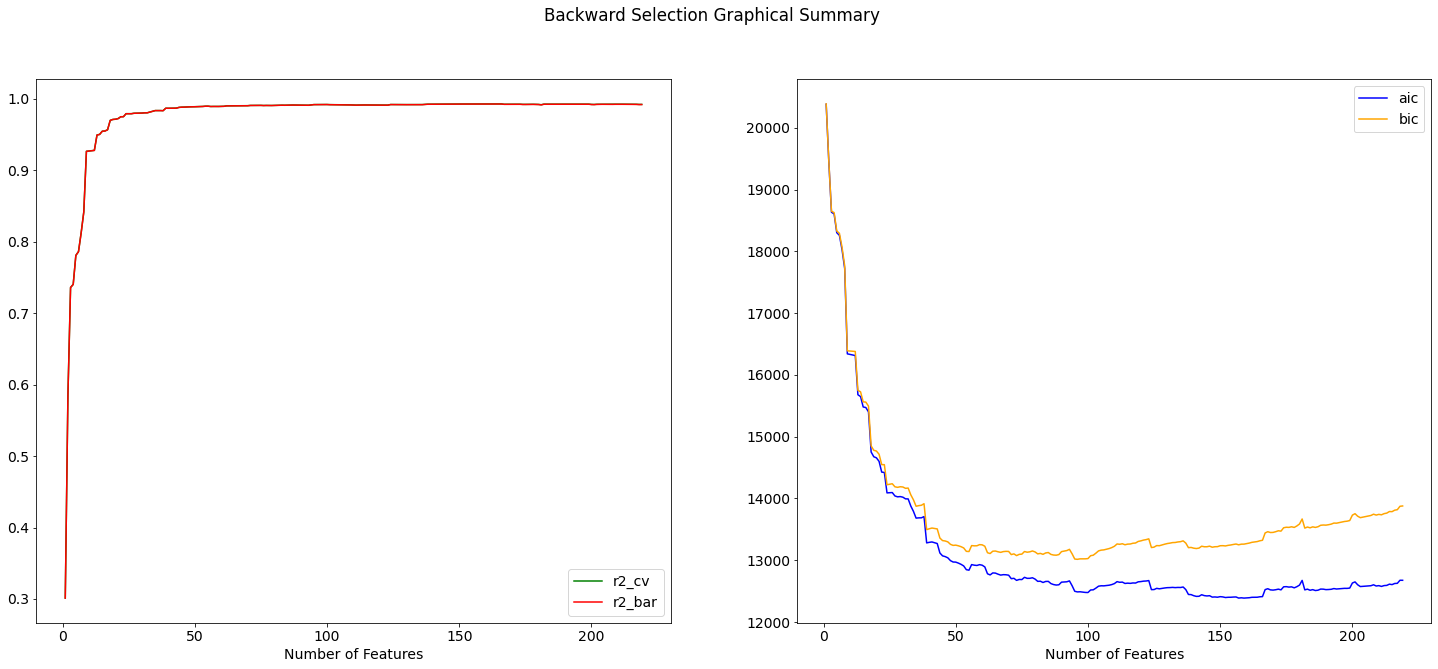

In [30]:
backwardSelection(lr_c, X_cubic, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     6679.
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:23:15   Log-Likelihood:                -42470.
No. Observations:                8991   AIC:                         8.536e+04
Df Residuals:                    8779   BIC:                         8.687e+04
Df Model:                         211                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.0807  

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:479: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


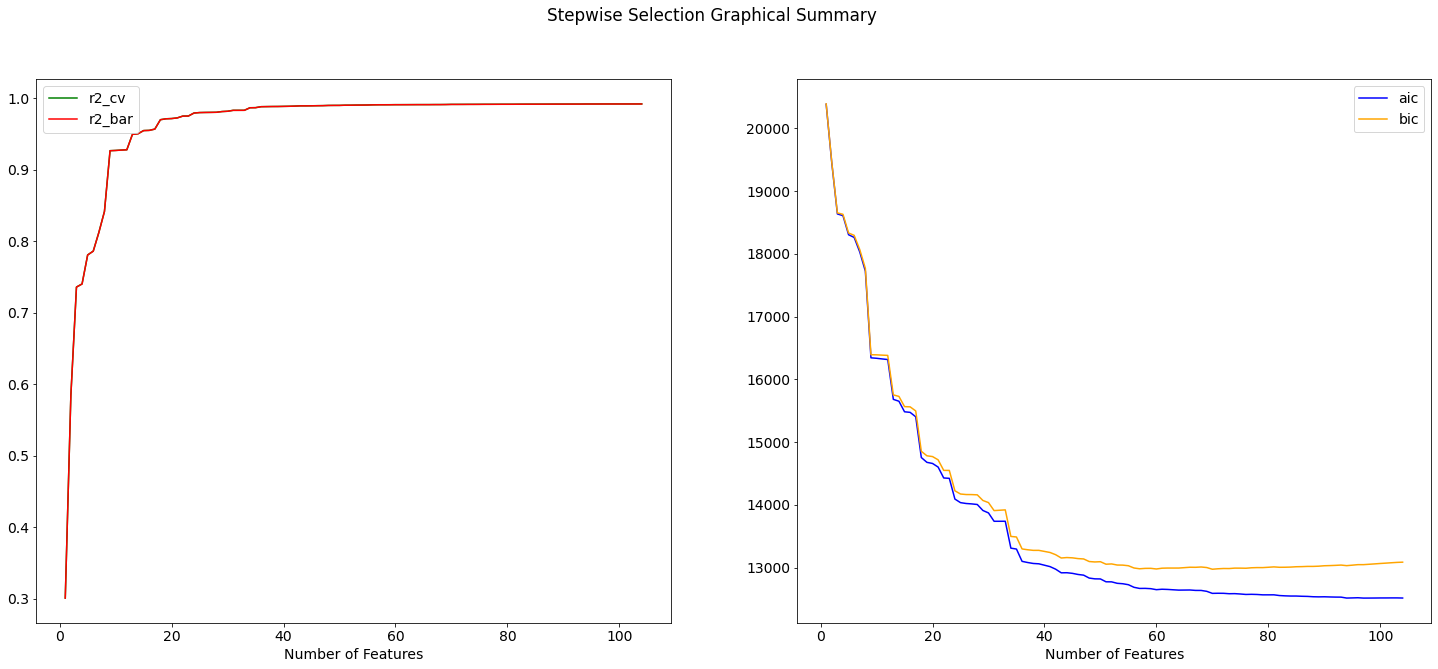

In [31]:
stepwiseSelection(lr_c, X_cubic, y)